# The Python numeric and plotting libraries

The `numpy` library makes a number of useful functions available to you. Functions that can create a list of numbers, generate a matrix of numbers, and perform some more sophisticated calculations. Using the `matplotlib` library, we can start making plots of many styles. We will use both of these libraries a lot in this class. In this computational problem, you will use functions from these libraries to plot vector fields. As before, this notebook will go through a complete example, which you can use to solve your problems.

### [Skip to problem to solve](./HW1-VectorFieldsProblem.ipynb#Problems-to-solve)

## Getting started with `numpy` and `matplotlib`
As we have done already, we will start by importing both libraries into the notebook. In this case, we use a different way of importing the libraries, which names the libraries with some shorthand (i.e., `np` and `plt`). Importing the libraries this way is helpful because sometimes the same function and/or method name appear in the base Python or other libraries you might using, which can cause a conflict as the function or method from the other library or the Python base might not do the exact same thing as the one you want. It is good practice to do this for `numpy` and `matplotlib`. 

Below, we import both libraries and tell `matplotlib` to use a plot style, which just makes the plots nicer looking (i.e., easier to read). We also make sure that matplotlib will produce the plots inline (i.e., in the notebook) rather than as a separate figure by calling `%matplotlib inline` .

In [1]:
import numpy as np                # imports the numerical library
import matplotlib.pyplot as plt   # imports the plotting library
plt.style.use('fivethirtyeight')  # sets up pretty plots
%matplotlib inline

## Creating a vector field
In this example, we intend to plot the vector field $\vec{v}(x,y) = y\hat{x}$, which should be a field where all the vector point along x-axis (or along the negative x-axis below y=0) and increase their magnitude as we move vertically away from the origin. *Do you see why?*

### Creating a set of points for the x-y plane
To do this, we must first construct set of points that describes the x-y plane, that is, we to make this plot, Python needs to know that we have a bunch of points across the x-y plane for which we intend to place vectors. The canonical way that this is done is using the `arange` and `meshgrid` methods of `numpy`.

### Using `np.arange`

For our purposes, the `arange` method will produce a list of numbers. It will start and end where we specify with whatever spacing we choose. As an example, we can produce a list from 1 through 10 by ones, from -1 to 1 in steps of 0.1, or anything else we choose. This method is really helpful for making a quick array of numbers.

In [2]:
one_through_ten = np.arange(1,11,1)                        # Notice that 11 is the stop point
print('One through Ten by Ones', one_through_ten)
minus_one_to_plus_one = np.arange(-1,1.1,0.1)              # Notice that 1.1 is the stop point
print('Minus One to Plus One', minus_one_to_plus_one)

One through Ten by Ones [ 1  2  3  4  5  6  7  8  9 10]
Minus One to Plus One [-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00]


### Using np.meshgrid

As we will use it `meshgrid` creates a mesh - a set points on the x-y plane - where we can plot vectors. In a sense, it provides all the coorindates across the x-y plane that we want to specify. It does this by taking two linear arrays - lists of numbers - and producing two 2D arrays - think matrix - that contain repeated versions of each array.

Consider the example below, where we use two arrays `a` and `b` that contain all the numbers from -2 to 2 by ones. `meshgrid` takes those two arrays as arguments and produces two 2D arrays `A` and `B`, which are repeated versions of `a` (`A` does this by row) and `b` (`B` does this by column) respectively.

By combining `A` and `B`, we have a mesh that describes every *unit* point on the x-y plane in the box that is bounded by -2 and +2 in both x and y. 

*To see this, think about taking each cell in the matrix `A` and combining with its partner in `B` as an order pair.*

In [3]:
a = np.arange(-2,3,1)
b = np.arange(-2,3,1)
A, B = np.meshgrid(a,b)
print('A = ', A)
print('B = ', B)

A =  [[-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]]
B =  [[-2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2  2  2  2  2]]


### Creating a vector function
Now that we have a list of all the points in the x-y plane, we can construct a vector function. `meshgrid` produces the points for us, but those points need to be used to calclate the vector function of our choosing. In our case, we intend to use the vector function $\vec{v}(x,y,z) = y\hat{x}$ as our example function. 

We start by first preparing a mesh the describes all the points in the x-y plane from -5 to 5 in steps of 0.5. *This choice was arbitrary, but gives a decent visualization.*

In [4]:
x = np.arange(-5,6,0.5)
y = np.arange(-5,6,0.5)
X, Y = np.meshgrid(x,y)

To form the function that we want, we will describe it by its components ($v_x$ and $v_y$). From the above function we know that,

$$v_x = y$$
$$v_y = 0$$

Because `X` and `Y` describe the points on the mesh, we will use them to perform our calculation of the vector field.

In [5]:
vx = Y
vy = 0

In [6]:
X

array([[-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5],
       [-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5],
       [-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5],
       [-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5],
       [-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5],
       [-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5],
       [-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. , 

### Plotting a vector function with `matplotlib`
Until now, we have only used methods from the `numpy` library to perform the necessary mathematical calculations to construct the vector field. To visualize it, we will use the `quiver` method from the `matplotlib.pyplot` library.

Quiver diagrams need 4 arguments:
* The location of the points to plot the vectors (x-y plane points), which form 2 of the arguments, and
* The size a direction of the vectors to plot at those points (the components of the vectors), which form the other two arguments

We have all these arguments (`X` and `Y` are mesh points and `vx` and `vy` provide the components). We can now plot the field. 

(-5.0, 5.0)

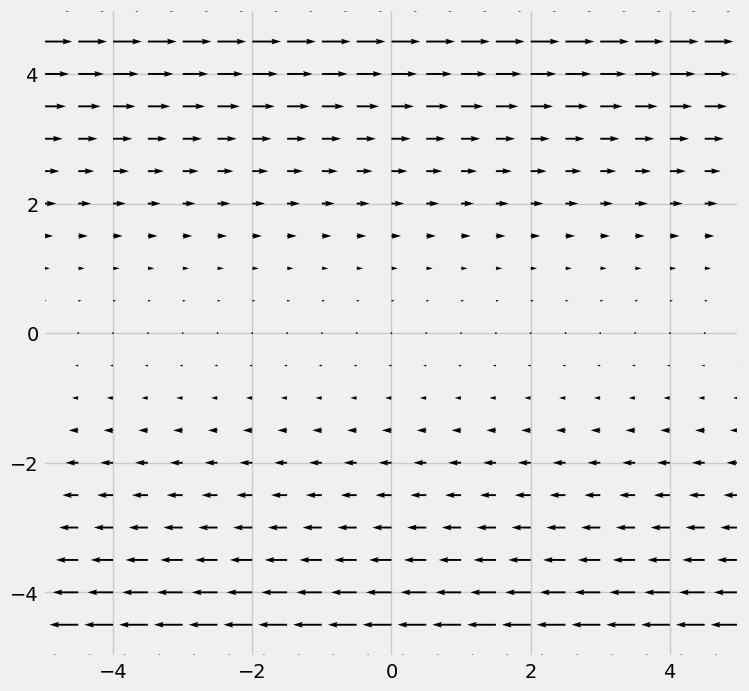

In [7]:
plt.figure(figsize=(8,8))          # creates the figure object; used when you need a figure (8,8) is just a nice size
plt.quiver(X,Y,5*vx,5*vy)              # The call to quiver actually generates the plot
plt.xlim([-5, 5])                  # Sets the limits of the plot (not needed as Jupyter will autoscale)
plt.ylim([-5, 5])

## Problems to solve
Now that you have seen an example of making a plot of a vector field using `quiver`, make similar plots for the following fields. Make sure you comment on possible physical situtations from which they might stem.

1. \\(\vec{v}(x,y)=r\hat{r}\\) (where \\(\vec{r}\\) refers to the usual \\(\vec{r}\\)in spherical coordinates.)
2. \\(\vec{v}(x,y) = \dfrac{x}{(\sqrt{x^2+y^2})^3}\hat{x}+\dfrac{y}{(\sqrt{x^2+y^2})^3}\hat{y}\\)
3. \\(\vec{v}(x,y) = \hat{\phi}\\) (where \\(\\phi\\) is the usual plane-polar coordinate.)